In [70]:
import pandas as pd
import warnings
import plotly.express as px
import numpy as np

In [71]:
athletes_df = pd.read_csv('../clean_data/data/output/athletes.csv')
hosts_df = pd.read_csv('../clean_data/data/output/hosts.csv')
results_df = pd.read_csv('../clean_data/data/output/results_jo.csv')

In [72]:
hosts_df.isnull().sum()

game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [73]:
hosts_df.head(10)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
6,vancouver-2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z,Canada,Vancouver 2010,Winter,2010
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
8,turin-2006,2006-02-26T19:00:00Z,2006-02-10T07:00:00Z,Italy,Turin 2006,Winter,2006
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004


In [74]:
jo_types = hosts_df[['game_slug', 'game_season', 'game_year', 'game_end_date', 'game_start_date']]
jo_types.head(10)

,game_slug,game_season,game_year,game_end_date,game_start_date
0,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
1,tokyo-2020,Summer,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
2,pyeongchang-2018,Winter,2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z
3,rio-2016,Summer,2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z
4,sochi-2014,Winter,2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z
5,london-2012,Summer,2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z
6,vancouver-2010,Winter,2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z
7,beijing-2008,Summer,2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z
8,turin-2006,Winter,2006,2006-02-26T19:00:00Z,2006-02-10T07:00:00Z
9,athens-2004,Summer,2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z


In [75]:
results_df.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,Mixed
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,Mixed
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,Mixed
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,Mixed
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,Mixed
5,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Zuzana HAJKOVA', 'https://olympics.com/en/a...",False,6,Czech Republic,CZ,CZE,NaN,NaN,Mixed
6,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jenny PERRET', 'https://olympics.com/en/ath...",False,7,Switzerland,CH,SUI,NaN,NaN,Mixed
7,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Vicky PERSINGER', 'https://olympics.com/en/...",False,8,United States of America,US,USA,NaN,NaN,Mixed
8,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Suyuan FAN', 'https://olympics.com/en/athle...",False,9,People's Republic of China,CN,CHN,NaN,NaN,Mixed
9,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Tahli GILL', 'https://olympics.com/en/athle...",False,10,Australia,AU,AUS,NaN,NaN,Mixed


In [76]:
hosts_results_merge = results_df.merge(jo_types, left_on='slug_game', right_on="game_slug")
hosts_results_merge.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_season,game_year,game_end_date,game_start_date
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
5,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Zuzana HAJKOVA', 'https://olympics.com/en/a...",False,6,Czech Republic,CZ,CZE,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
6,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jenny PERRET', 'https://olympics.com/en/ath...",False,7,Switzerland,CH,SUI,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
7,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Vicky PERSINGER', 'https://olympics.com/en/...",False,8,United States of America,US,USA,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
8,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Suyuan FAN', 'https://olympics.com/en/athle...",False,9,People's Republic of China,CN,CHN,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
9,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Tahli GILL', 'https://olympics.com/en/athle...",False,10,Australia,AU,AUS,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z


In [77]:
hosts_results_merge.game_season.unique()

array(['Winter', 'Summer'], dtype=object)

In [78]:
summer_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Summer')].copy()
winter_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Winter')].copy()

In [79]:
summer_games_results.drop(['game_season'], axis=1, inplace=True)
summer_games_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date
3784,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,ESP,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3785,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,SMR,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3786,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,USA,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3787,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,SVK,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3788,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,JPN,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z


In [80]:
summer_games_results.isnull().sum()

discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               101672
athletes                  10586
rank_equal                90721
rank_position              3858
country_name                  0
country_code               3555
country_3_letter_code         0
value_unit                68966
value_type                61920
event_gender                  0
game_slug                     0
game_year                     0
game_end_date                 0
game_start_date               0
dtype: int64

In [81]:
# summer_games_results.drop_duplicates(inplace=True)
# summer_games_results.duplicated().sum()

dopplers = summer_games_results.loc[(summer_games_results.duplicated())]
dopplers

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date
154361,Water Polo,Water Polo Women,antwerp-1920,GameTeam,NaN,NaN,NaN,1,Netherlands,NL,NED,2,SCORE,Women,antwerp-1920,1920,1920-09-12T19:00:00Z,1920-04-20T07:00:00Z
155336,Sailing,8m mixed,stockholm-1912,GameTeam,NaN,NaN,NaN,5,Russian Federation,RU,RUS,0,POINTS,Mixed,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157014,Shooting,trap 125 targets men,stockholm-1912,Athlete,GOLD,"[('Jay Graham', nan)]",NaN,1,United States of America,US,USA,96,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157015,Shooting,trap 125 targets men,stockholm-1912,Athlete,SILVER,"[('Alfred GOELDEL', 'https://olympics.com/en/a...",NaN,2,Germany,DE,GER,94,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157016,Shooting,trap 125 targets men,stockholm-1912,Athlete,BRONZE,"[('Harry Blaus', nan)]",NaN,3,Russian Federation,RU,RUS,91,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161736,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161737,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161738,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161739,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z


In [82]:
summer_games_results.medal_type.unique()

array(['GOLD', 'SILVER', 'BRONZE', nan], dtype=object)

In [83]:
summer_games_results['medal_type'] = summer_games_results['medal_type'].fillna('None')

In [84]:
summer_games_results['total_medals'] = summer_games_results['medal_type'].apply(lambda x: 0 if x == 'None' else 1)
summer_games_results['gold_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'GOLD' else 0)
summer_games_results['silver_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'SILVER' else 0)
summer_games_results['bronze_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'BRONZE' else 0)
summer_games_results.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date,total_medals,gold_medals,silver_medals,bronze_medals
3784,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,1,0,0
3785,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,0,1,0
3786,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,0,0,1
3787,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3788,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3789,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Penny SMITH', 'https://olympics.com/en/athl...",False,6,Australia,AU,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3790,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Laetisha SCANLAN', 'https://olympics.com/en...",False,7,Australia,AU,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3791,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Jana SPOTAKOVA', 'https://olympics.com/en/a...",False,8,Slovakia,SK,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3792,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Xiaojing WANG', 'https://olympics.com/en/at...",False,9,People's Republic of China,CN,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3793,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Kirsty HEGARTY', 'https://olympics.com/en/a...",False,10,Great Britain,GB,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0


In [85]:
historic_medalsbycountry = summer_games_results.groupby(['game_year','country_name']).agg({'total_medals':'sum', 'gold_medals':'sum', 'silver_medals':'sum','bronze_medals':'sum'})
historic_medalsbycountry.head(10)

total_medals  gold_medals  silver_medals  \
game_year country_name                                              
1896      Australia                 2            2              0   
          Austria                   5            2              1   
          Chile                     0            0              0   
          Denmark                   6            1              2   
          France                   11            5              4   
          Germany                  13            6              5   
          Great Britain             7            2              3   
          Greece                   47           10             18   
          Hungary                   6            2              1   
          Italy                     0            0              0   

                         bronze_medals  
game_year country_name                  
1896      Australia                  0  
          Austria                    2  
          Chile                      0  
          Denmark                    3  
          France                     2  
          Germany                    2  
          Great Britain              2  
          Greece                    19  
          Hungary                    3  
          Italy                      0

In [86]:
historic_medalsbycountry = historic_medalsbycountry.sort_values(by=['game_year','total_medals'],ascending=[True, False])
historic_medalsbycountry.head(10)

total_medals  gold_medals  silver_medals  \
game_year country_name                                                         
1896      Greece                              47           10             18   
          United States of America            20           11              7   
          Germany                             13            6              5   
          France                              11            5              4   
          Great Britain                        7            2              3   
          Denmark                              6            1              2   
          Hungary                              6            2              1   
          Austria                              5            2              1   
          Switzerland                          3            1              2   
          Australia                            2            2              0   

                                    bronze_medals  
game_year country_name                             
1896      Greece                               19  
          United States of America              2  
          Germany                               2  
          France                                2  
          Great Britain                         2  
          Denmark                               3  
          Hungary                               3  
          Austria                               2  
          Switzerland                           0  
          Australia                             0

In [87]:
historic_sportsbycountry = summer_games_results.groupby(['game_year','country_name','discipline_title']).count()
historic_sportsbycountry.head(10)

event_title  slug_game  \
game_year country_name discipline_title                              
1896      Australia    Athletics                      3          3   
                       Tennis                         1          1   
          Austria      Cycling Track                  4          4   
                       Fencing                        1          1   
                       Swimming                       4          4   
          Chile        Athletics                      2          2   
          Denmark      Athletics                      5          5   
                       Fencing                        1          1   
                       Gymnastics Artistic            1          1   
                       Shooting                       7          7   

                                            participant_type  medal_type  \
game_year country_name discipline_title                                    
1896      Australia    Athletics                           3           3   
                       Tennis                              1           1   
          Austria      Cycling Track                       4           4   
                       Fencing                             1           1   
                       Swimming                            4           4   
          Chile        Athletics                           2           2   
          Denmark      Athletics                           5           5   
                       Fencing                             1           1   
                       Gymnastics Artistic                 1           1   
                       Shooting                            7           7   

                                            athletes  rank_equal  \
game_year country_name discipline_title                            
1896      Australia    Athletics                   3           0   
                       Tennis                      1           1   
          Austria      Cycling Track               4           0   
                       Fencing                     1           0   
                       Swimming                    4           0   
          Chile        Athletics                   2           0   
          Denmark      Athletics                   5           0   
                       Fencing                     1           0   
                       Gymnastics Artistic         1           0   
                       Shooting                    7           1   

                                            rank_position  country_code  \
game_year country_name discipline_title                                   
1896      Australia    Athletics                        3             3   
                       Tennis                           1             1   
          Austria      Cycling Track                    4             4   
                       Fencing                          1             1   
                       Swimming                         4             4   
          Chile        Athletics                        2             2   
          Denmark      Athletics                        3             5   
                       Fencing                          1             1   
                       Gymnastics Artistic              1             1   
                       Shooting                         7             7   

                                            country_3_letter_code  value_unit  \
game_year country_name discipline_title                                         
1896      Australia    Athletics                                3           2   
                       Tennis                                   1           0   
          Austria      Cycling Track                            4           2   
                       Fencing                                  1           0   
                       Swimming                                 4           2   
     

In [88]:
historic_sportsbycountry = historic_sportsbycountry[['event_title']].reset_index()
historic_sportsbycountry = historic_sportsbycountry.rename({'discipline_title':'sports', 'event_title':'epreuves'},axis=1)
historic_sportsbycountry

,game_year,country_name,sports,epreuves
0,1896,Australia,Athletics,3
1,1896,Australia,Tennis,1
2,1896,Austria,Cycling Track,4
3,1896,Austria,Fencing,1
4,1896,Austria,Swimming,4
...,...,...,...,...
23451,2020,Zambia,Boxing,3
23452,2020,Zambia,Football,1
23453,2020,Zambia,Judo,1
23454,2020,Zimbabwe,Golf,1


In [89]:
historic_sportsbycountry = historic_sportsbycountry.groupby(['game_year','country_name']).agg({'sports':'count'})
historic_sportsbycountry

sports
game_year country_name                   
1896      Australia                     2
          Austria                       3
          Chile                         1
          Denmark                       6
          France                        7
...                                   ...
2020      Virgin Islands, British       1
          Virgin Islands, US            1
          Yemen                         2
          Zambia                        3
          Zimbabwe                      2

[2889 rows x 1 columns]

In [90]:
historic_epreuvesbycountry = summer_games_results.groupby(['game_year','country_name','event_title']).count()
historic_epreuvesbycountry

discipline_title  \
game_year country_name event_title                                      
1896      Australia    1500m men                                    1   
                       800m men                                     1   
                       Singles men                                  1   
                       marathon men                                 1   
          Austria      100km men                                    1   
...                                                               ...   
2020      Zambia       Men's Fly (48-52kg)                          1   
                       Men's Welter (63-69kg)                       1   
                       Women                                        1   
          Zimbabwe     Men's Individual Stroke Play                 1   
                       Men's Single Sculls                          1   

                                                     slug_game  \
game_year country_name event_title                               
1896      Australia    1500m men                             1   
                       800m men                              1   
                       Singles men                           1   
                       marathon men                          1   
          Austria      100km men                             1   
...                                                        ...   
2020      Zambia       Men's Fly (48-52kg)                   1   
                       Men's Welter (63-69kg)                1   
                       Women                                 1   
          Zimbabwe     Men's Individual Stroke Play          1   
                       Men's Single Sculls                   1   

                                                     participant_type  \
game_year country_name event_title                                      
1896      Australia    1500m men                                    1   
                       800m men                                     1   
                       Singles men                                  1   
                       marathon men                                 1   
          Austria      100km men                                    1   
...                                                               ...   
2020      Zambia       Men's Fly (48-52kg)                          1   
                       Men's Welter (63-69kg)                       1   
                       Women                                        1   
          Zimbabwe     Men's Individual Stroke Play                 1   
                       Men's Single Sculls                          1   

                                                     medal_type  athletes  \
game_year country_name event_title                                          
1896      Australia    1500m men                              1         1   
                       800m men                               1         1   
                       Singles men                            1         1   
                       marathon men                           1         1   
          Austria      100km men                              1         1   
...                                                         ...       ...   
2020      Zambia       Men's Fly (48-52kg)                    1         1   
                       Men's Welter (63-69kg)                 1         1   
                       Women                                  1         0   
          Zimbabwe     Men's Individual Stroke Play           1         1   
                       Men's Single Sculls                    1         1   

                                                     rank_equal  \
game_year country_name event_title                                
1896      Australia    1500m men                              0   
                       800m men                               0   
                       S

In [91]:
historic_epreuvesbycountry = historic_epreuvesbycountry[['discipline_title']].reset_index()
historic_epreuvesbycountry = historic_epreuvesbycountry.rename({'event_title':'epreuves', 'discipline_title':'participation'},axis=1)
historic_epreuvesbycountry = historic_epreuvesbycountry.groupby(['game_year','country_name']).agg({'epreuves':'count'})
historic_epreuvesbycountry = historic_epreuvesbycountry.reset_index()
historic_epreuvesbycountry

,game_year,country_name,epreuves
0,1896,Australia,4
1,1896,Austria,8
2,1896,Chile,2
3,1896,Denmark,14
4,1896,France,20
...,...,...,...
2884,2020,"Virgin Islands, British",2
2885,2020,"Virgin Islands, US",1
2886,2020,Yemen,2
2887,2020,Zambia,5


In [92]:
historic_olympic_data = historic_medalsbycountry.merge(historic_sportsbycountry, on=['game_year','country_name'])
historic_olympic_data = historic_olympic_data.merge(historic_epreuvesbycountry, on=['game_year','country_name'])
historic_olympic_data = historic_olympic_data.sort_values(by=['game_year','total_medals'],ascending=[True, False])
historic_olympic_data

,game_year,country_name,total_medals,gold_medals,silver_medals,bronze_medals,sports,epreuves
0,1896,Greece,47,10,18,19,10,39
1,1896,United States of America,20,11,7,2,3,17
2,1896,Germany,13,6,5,2,7,27
3,1896,France,11,5,4,2,7,20
4,1896,Great Britain,7,2,3,2,9,20
...,...,...,...,...,...,...,...,...
2884,2020,"Virgin Islands, British",0,0,0,0,1,2
2885,2020,"Virgin Islands, US",0,0,0,0,1,1
2886,2020,Yemen,0,0,0,0,2,2
2887,2020,Zambia,0,0,0,0,3,5


In [93]:
historic_olympic_data.loc[(historic_olympic_data['country_name'] == 'France') & (historic_olympic_data['game_year'] == 2020)]

,game_year,country_name,total_medals,gold_medals,silver_medals,bronze_medals,sports,epreuves
2708,2020,France,33,10,12,11,40,146


In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

Préparation des données

In [95]:
df = historic_olympic_data

#préparer les dataframes pour les trois types de médailles
gold_df = df.pivot_table(index='country_name', columns='game_year', values='gold_medals', fill_value=0)
silver_df = df.pivot_table(index='country_name', columns='game_year', values='silver_medals', fill_value=0)
bronze_df = df.pivot_table(index='country_name', columns='game_year', values='bronze_medals', fill_value=0)

#on garde les 25 premiers pays en utilsant le nombre de médailles totales
top_countries = df.groupby('country_name')['total_medals'].sum().nlargest(25).index
gold_data = gold_df.loc[top_countries]
silver_data = silver_df.loc[top_countries]
bronze_data = bronze_df.loc[top_countries]

In [96]:
#normalisation des données
scaler = MinMaxScaler()
gold_data_normalized = scaler.fit_transform(gold_data.T).T
silver_data_normalized = scaler.fit_transform(silver_data.T).T
bronze_data_normalized = scaler.fit_transform(bronze_data.T).T

In [97]:
#création des séquences
look_back = 15
gold_data_normalized = gold_data_normalized.T
silver_data_normalized = silver_data_normalized.T
bronze_data_normalized = bronze_data_normalized.T

gold_train_generator = TimeseriesGenerator(gold_data_normalized, gold_data_normalized, length=look_back, batch_size=1)
silver_train_generator = TimeseriesGenerator(silver_data_normalized, silver_data_normalized, length=look_back, batch_size=1)
bronze_train_generator = TimeseriesGenerator(bronze_data_normalized, bronze_data_normalized, length=look_back, batch_size=1)

Les modèles

In [98]:
#le modèle pour les médailles d'or
model_gold = Sequential([
    LSTM(50, input_shape=(look_back, gold_data_normalized.shape[1])),
    Dense(gold_data_normalized.shape[1])
])
model_gold.compile(optimizer='adam', loss='mean_squared_error')
model_gold.fit(gold_train_generator, epochs=20, verbose=1)

Epoch 1/20


C:\Users\patpot74\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1837
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1057 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0665 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0620 


C:\Users\patpot74\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0581 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0530 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438 
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321 
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 
Epoch 16/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393 
Epoch 17/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373 
Epoch 18/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 
Epoch 19/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0451 


In [99]:
#le modèle pour les médailles d'argent
model_silver = Sequential([
    LSTM(50, input_shape=(look_back, silver_data_normalized.shape[1])),
    Dense(silver_data_normalized.shape[1])
])
model_silver.compile(optimizer='adam', loss='mean_squared_error')
model_silver.fit(silver_train_generator, epochs=20, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1608
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0635 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0520 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0426 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0503 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0554 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0359 
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0476 
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 
Epoch

In [100]:
#le modèle pour les médailles de bronze
model_bronze = Sequential([
    LSTM(50, input_shape=(look_back, bronze_data_normalized.shape[1])),
    Dense(bronze_data_normalized.shape[1])
])
model_bronze.compile(optimizer='adam', loss='mean_squared_error')
model_bronze.fit(bronze_train_generator, epochs=20, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2256
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1241 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0805 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0560 
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0406 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0497 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0352 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0327 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0507 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396 
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0416 
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375 
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 
Epoch

In [101]:
#prédiction 2024 pour chaque type de médaille
gold_predictions_normalized = model_gold.predict(np.array([gold_data_normalized[-look_back:]]))
silver_predictions_normalized = model_silver.predict(np.array([silver_data_normalized[-look_back:]]))
bronze_predictions_normalized = model_bronze.predict(np.array([bronze_data_normalized[-look_back:]]))

gold_predictions_2024 = scaler.inverse_transform(gold_predictions_normalized)[0]
silver_predictions_2024 = scaler.inverse_transform(silver_predictions_normalized)[0]
bronze_predictions_2024 = scaler.inverse_transform(bronze_predictions_normalized)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Le graphique

In [102]:
#les labels du graphique
country_names = top_countries

#pays à exclure de l'affichage
countries_to_exclude = ['German Democratic Republic (Germany)', 'Federal Republic of Germany', 'Soviet Union']

#filtrer les prédictions et les noms des pays
filtered_gold_predictions = [pred for country, pred in zip(country_names, gold_predictions_2024) if country not in countries_to_exclude]
filtered_silver_predictions = [pred for country, pred in zip(country_names, silver_predictions_2024) if country not in countries_to_exclude]
filtered_bronze_predictions = [pred for country, pred in zip(country_names, bronze_predictions_2024) if country not in countries_to_exclude]
filtered_country_names = [country for country in country_names if country not in countries_to_exclude]

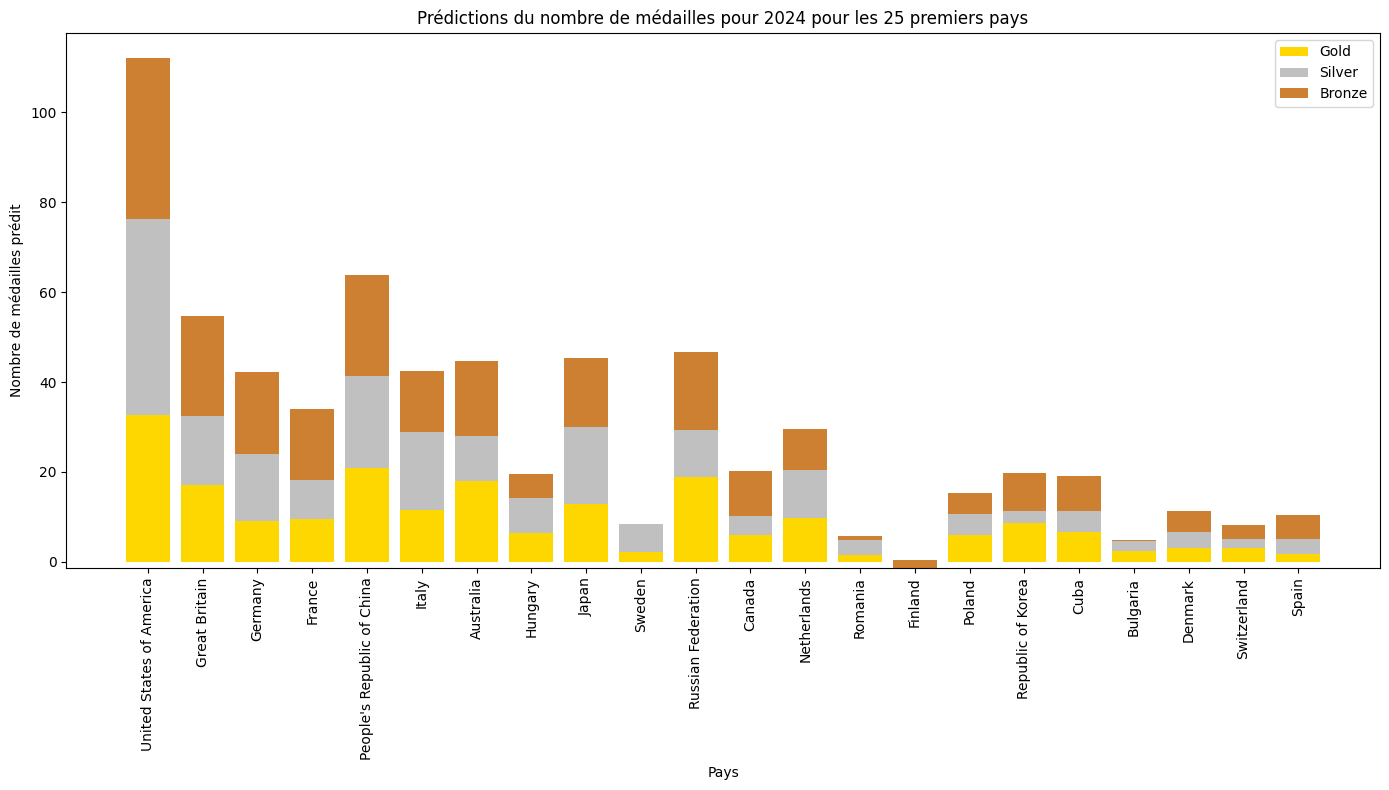

In [103]:
plt.figure(figsize=(14, 8))
plt.bar(filtered_country_names, filtered_gold_predictions, color='gold', label='Gold')
plt.bar(filtered_country_names, filtered_silver_predictions, color='silver', label='Silver', bottom=filtered_gold_predictions)
plt.bar(filtered_country_names, filtered_bronze_predictions, color='#cd7f32', label='Bronze', bottom=np.array(filtered_gold_predictions)+np.array(filtered_silver_predictions))
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles prédit')
plt.title('Prédictions du nombre de médailles pour 2024 pour les 25 premiers pays')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
model_gold_touspays_loaded = model_gold.save('model_gold_touspays.h5')
model_silver_touspays_loaded = model_silver.save('model_silver_touspays.h5')
model_bronze_touspays_loaded = model_bronze.save('model_bronze_touspays.h5')